## RETAIL WALMART STORE SALES PREDICTION - FORECASTING


### Importing Necessary Libraries


In [2]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline
plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['axes.grid'] = True

In [87]:
# Importing Relevant Data Sets
stores=pd.read_csv("stores.csv")
train=pd.read_csv("train.csv",parse_dates=['Date'])
features=pd.read_csv("features.csv",parse_dates=['Date'])
test = pd.read_csv("test.csv",parse_dates=['Date'])

In [88]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [90]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null datetime64[ns]
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 711.9 KB


In [91]:
df_train = pd.merge(train,features,on=['Store','Date','IsHoliday'], how='inner')


In [92]:
df_train = pd.merge(df_train,stores,on=['Store'], how='inner')

In [93]:
df_train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


### Missing Value Traetment

In [94]:
df_train.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [95]:
df_train['MarkDown1'] = df_train['MarkDown1'].fillna(0)
df_train['MarkDown2'] = df_train['MarkDown2'].fillna(0)
df_train['MarkDown3'] = df_train['MarkDown3'].fillna(0)
df_train['MarkDown4'] = df_train['MarkDown4'].fillna(0)
df_train['MarkDown5'] = df_train['MarkDown5'].fillna(0)

In [97]:
df_train['WeekNumber'] = df_train['Date'].dt.strftime('%U')

### Outlier Treatment

In [99]:
df_1=df_train.drop(["Date"],axis=1)
df_2=df_train["Date"]

In [98]:
Q1 = df_train.quantile(0.05)
Q3 = df_train.quantile(0.95)

IQR = Q3 - Q1

In [100]:
df_train = df_1[~((df_1 < (Q1 - 1.5 * IQR)) |(df_1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [101]:
df_train.head(5)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,WeekNumber
0,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,05
1,1,2,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,05
2,1,3,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,05
3,1,4,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,05
4,1,5,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,05


In [102]:
df_train.shape

(391930, 16)

In [109]:
df_train['IsHoliday'] = df_train['IsHoliday'].map({False:0, True:1})

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
df_train['Type'] = df_train['Type'].map({'A':1, 'B':2,'C':3})

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [128]:
df_train.head(4)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,WeekNumber
0,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,05
1,1,2,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,05
2,1,3,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,05
3,1,4,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,05


In [130]:
#df_train.to_excel("df_train.xlsx")

In [3]:
df_train=pd.read_excel("df_train.xlsx")

In [4]:
scaler = StandardScaler()

In [5]:
df_train_s = pd.DataFrame(scaler.fit_transform(df_train[['Weekly_Sales','Temperature',
   'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
   'MarkDown5', 'CPI', 'Unemployment','Size','Store','Dept','IsHoliday','Type','WeekNumber']]),
columns=[
  'Weekly_Sales','Temperature',
   'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
   'MarkDown5', 'CPI', 'Unemployment','Size','Store','Dept','IsHoliday','Type','WeekNumber'])

In [52]:
df_train_s.head(3)

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Store,Dept,IsHoliday,Type,WeekNumber
0,0.465109,-1.034287,-1.665369,-0.463775,-0.219114,-0.278676,-0.373055,-0.497661,1.019975,0.059297,0.271759,-1.662111,-1.415998,-0.252435,-0.899837,-1.520754
1,1.704026,-1.034287,-1.665369,-0.463775,-0.219114,-0.278676,-0.373055,-0.497661,1.019975,0.059297,0.271759,-1.662111,-1.383190,-0.252435,-0.899837,-1.520754
2,-0.074459,-1.034287,-1.665369,-0.463775,-0.219114,-0.278676,-0.373055,-0.497661,1.019975,0.059297,0.271759,-1.662111,-1.350381,-0.252435,-0.899837,-1.520754


In [53]:
df_train_s.isnull().sum().sum()

0

### Model 1 : Random Forest

In [54]:
X = df_train_s.drop(["Weekly_Sales"],axis=1)
Y = df_train_s[['Weekly_Sales']]
print(X.head())
print(Y.head())

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0    -1.034287   -1.665369  -0.463775  -0.219114  -0.278676  -0.373055   
1    -1.034287   -1.665369  -0.463775  -0.219114  -0.278676  -0.373055   
2    -1.034287   -1.665369  -0.463775  -0.219114  -0.278676  -0.373055   
3    -1.034287   -1.665369  -0.463775  -0.219114  -0.278676  -0.373055   
4    -1.034287   -1.665369  -0.463775  -0.219114  -0.278676  -0.373055   

   MarkDown5       CPI  Unemployment      Size     Store      Dept  IsHoliday  \
0  -0.497661  1.019975      0.059297  0.271759 -1.662111 -1.415998  -0.252435   
1  -0.497661  1.019975      0.059297  0.271759 -1.662111 -1.383190  -0.252435   
2  -0.497661  1.019975      0.059297  0.271759 -1.662111 -1.350381  -0.252435   
3  -0.497661  1.019975      0.059297  0.271759 -1.662111 -1.317572  -0.252435   
4  -0.497661  1.019975      0.059297  0.271759 -1.662111 -1.284763  -0.252435   

       Type  WeekNumber  
0 -0.899837   -1.520754  
1 -0.899837   -1

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

In [56]:
n_estimators=150
# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model = RandomForestRegressor(random_state=0, n_estimators=150,n_jobs = -1)
model.fit(x_train, y_train)

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [57]:
print("Train Model Score : ",model.score(x_train,y_train))
print("Test Model Score :", model.score(x_test,y_test))

Train Model Score :  0.9970422319267043
Test Model Score : 0.9787881419112407


In [58]:
y_predicted_train = model.predict(x_train)

In [59]:
t_y = y_train.reset_index()
f = pd.DataFrame(t_y)
f['Predicted'] = y_predicted_train.tolist()
f.head()

,index,Weekly_Sales,Predicted
0,79330,-0.189876,-0.208807
1,245246,-0.050271,-0.055586
2,30744,3.663217,3.362135
3,189598,-0.244393,-0.236587
4,67349,-0.723835,-0.722245


In [60]:
MAPE_train = np.mean(np.abs(f['Weekly_Sales'] - f['Predicted'])/f['Weekly_Sales'])
print('Mean Absolute Percentage Error:',MAPE_train)
print("Mean absolute error: ", mean_absolute_error(y_train,  model.predict(x_train)))
print("Mean squared error : ", metrics.mean_squared_error(y_train,  model.predict(x_train)))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(y_train,  model.predict(x_train))))


Mean Absolute Percentage Error: -0.04359899199029151
Mean absolute error:  0.024185592369262453
Mean squared error :  0.0029594913992568067
Root mean squared error :  0.054401207700351714


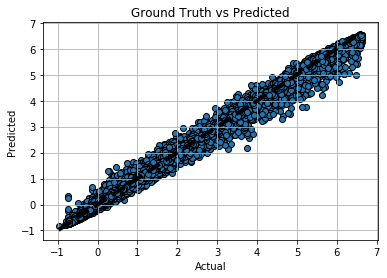

In [36]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_predicted_train, edgecolors=(0,0,0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [39]:
y_predicted_test = model.predict(x_test)

In [40]:
t_y = y_test.reset_index()
f = pd.DataFrame(t_y)
f['Predicted'] = y_predicted_test.tolist()
f.head()

,index,Weekly_Sales,Predicted
0,216384,1.471164,1.376580
1,192877,-0.224381,-0.121846
2,199988,0.532856,0.462985
3,5482,-0.731223,-0.727886
4,119085,1.354748,1.369627


In [41]:
MAPE_test = np.mean(np.abs(f['Weekly_Sales'] - f['Predicted'])/f['Weekly_Sales'])
print('Mean Absolute Percentage Error:',MAPE_test)
print("Mean absolute error: ", mean_absolute_error(y_test, y_predicted_test))
print("Mean squared error : ", metrics.mean_squared_error(y_test, y_predicted_test))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(y_test, y_predicted_test)))

Mean Absolute Percentage Error: -0.04121264827765907
Test Variance score:  0.9787881419112407
Mean absolute error:  0.06541661003546179
Mean squared error :  0.021174722369199764
Root mean squared error :  0.14551536815470648


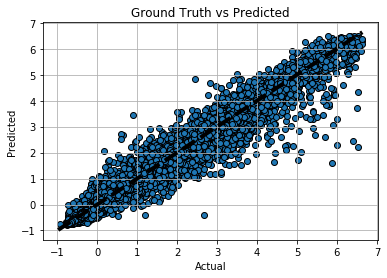

In [42]:
# So let's run the model against the test data
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted_test, edgecolors=(0,0,0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Model 2 : XG Boost

In [ ]:
#%pip install xgboost

In [43]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(objective='reg:linear', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5) 
xb = xgb_reg.fit(x_train, y_train)
y_pred=xgb_reg.predict(x_test)

[20:32:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [44]:
print("Train Model Score : ", xgb_reg.score(x_train,y_train))
print("Test Model Score :", xgb_reg.score(x_test,y_test))

Train Model Score :  0.9852418743545939
Test Model Score : 0.9758785032843159


In [45]:
y_predicted_train = xgb_reg.predict(x_train)

In [46]:
t_y = y_train.reset_index()
f = pd.DataFrame(t_y)
f['Predicted'] = y_predicted_train.tolist()
f.head()

,index,Weekly_Sales,Predicted
0,79330,-0.189876,-0.297243
1,245246,-0.050271,-0.175573
2,30744,3.663217,3.738610
3,189598,-0.244393,-0.097830
4,67349,-0.723835,-0.709159


In [47]:
MAPE_train = np.mean(np.abs(f['Weekly_Sales'] - f['Predicted'])/f['Weekly_Sales'])
print('Mean Absolute Percentage Error:',MAPE_train)
print('Test Variance score: ', r2_score(y_train, y_predicted_train))
print("Mean absolute error: ", mean_absolute_error(y_train, y_predicted_train))
print("Mean squared error : ", metrics.mean_squared_error(y_train, y_predicted_train))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(y_train, y_predicted_train)))

Mean Absolute Percentage Error: -2.578460964656446
Test Variance score:  0.9852418743545939
Mean absolute error:  0.07571258756059536
Mean squared error :  0.014766724379461997
Root mean squared error :  0.12151841168918394


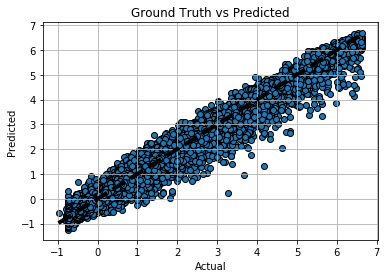

In [48]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_predicted_train, edgecolors=(0,0,0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [49]:
y_predicted_test = xgb_reg.predict(x_test)

In [50]:
t_y = y_test.reset_index()
f = pd.DataFrame(t_y)
f['Predicted'] = y_predicted_test.tolist()
f.head()

,index,Weekly_Sales,Predicted
0,216384,1.471164,1.434511
1,192877,-0.224381,-0.118979
2,199988,0.532856,0.471203
3,5482,-0.731223,-0.765383
4,119085,1.354748,1.237950


In [51]:
MAPE_test = np.mean(np.abs(f['Weekly_Sales'] - f['Predicted'])/f['Weekly_Sales'])
print('Mean Absolute Percentage Error:',MAPE_test)
print('Test Variance score: ',r2_score(y_test, y_predicted_test))
print("Mean absolute error: ", mean_absolute_error(y_test, y_predicted_test))
print("Mean squared error : ", metrics.mean_squared_error(y_test, y_predicted_test))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(y_test, y_predicted_test)))

Mean Absolute Percentage Error: -0.08641800709197603
Test Variance score:  0.9758785032843159
Mean absolute error:  0.08995665379784286
Mean squared error :  0.02407926707537443
Root mean squared error :  0.1551749563408169


## After comparing both the model it is found the MAPE of test and train is almost equal in RF model. Thus RF is performing well here